<a href="https://colab.research.google.com/github/wielandbrendel/computational_physics_2020/blob/master/01_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# we are going to classify a popular breast cancer dataset
data, target = datasets.load_breast_cancer(return_X_y=True)

In [3]:
# data is a matrix of shape (569, 30)
# the first number refers to the number of cases or samples while the second
# number refers to the number of features from which we try to predict
# breast cancer
# 
# please see the documentation @ https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
# for more details
data.shape

(569, 30)

In [4]:
# target is a binary vector of size (569,) in which each entry is the label of
# each case, either malignant (0) or benign (1).
target[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [5]:
# for simplicity we cut the number of features from 30 to just two features
data = data[:, :2]

In [6]:
# Excercise 1.1
# Try to find a linear classifier by hand that can classify the dataset 
# as good as possible. Let the classification rule be w1 * f1 + w2 * f2 + w3 > 0.5
# where w1, w2 and w3 are the weights to be learnt and f1, f2 are the features.
# What accuracy can you reach?

def classifier_score(data, w):
    return w[0] * data[:, 0] + w[1] * data[:, 1] + w[2]

def accuracy(scores, targets):
    return np.mean((scores > 0.5) == targets)

In [7]:
weights = np.array([0.03, 0.05, 0]) # selbst ausprobieren


In [8]:
# Execise 1.1a (optional but helpful)
# create a 2d scatter plot with all data points and visualize the model
# predictions, e.g. by coloring them with matplotlib's `fill` method

def plot_data(points, targets, weights):
        # heatmap
    xs = np.linspace(0, 30)
    ys = np.linspace(5, 40)
    XS, YS = np.meshgrid(xs, ys)
    grid_data = np.array([XS.flatten(), YS.flatten()]).T
    print(grid_data.shape)
    heatmap_scores = classifier_score(grid_data, weights)
    print(heatmap_scores.shape)

    plt.pcolormesh(XS, YS, heatmap_scores.reshape(XS.shape))
    plt.colorbar()
    plt.contour(XS, YS, heatmap_scores.reshape(XS.shape), levels=[0.5], colors=['yellow'])


    # data points
    colors = ['blue' if target == 0 else 'red' for target in targets]
    plt.scatter(points[:, 0], points[:, 1], c=colors)

0.8998242530755711
(2500, 2)
(2500,)


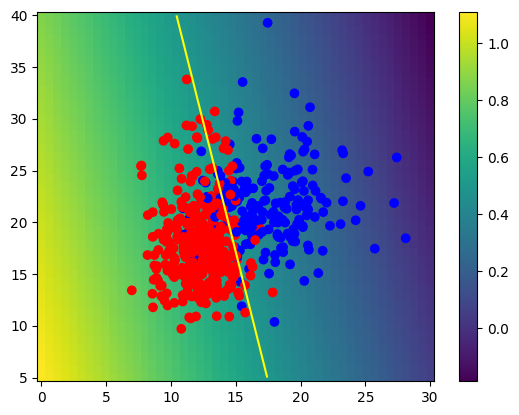

In [9]:
weights = np.array([-0.035, -0.007, -0.855+2]) # selbst ausprobieren
scores = classifier_score(data, weights)
print(accuracy(scores, target))

plot_data(data, target, weights)

Von Hand konnte eine Accuracy von 89.98% erreicht werden.

In [10]:

# Excercise 1.2
# Learn the optimal parameters automatically using gradient descent. For the
# loss function use a simple squared loss (t - tp)**2 where t is the target
# label (either 0 or 1) and tp = w1 * f1 + w2 * f2 + w3 is the predicted label.
# What accuracy can you reach? Why is this loss function problematic? Is there
# a better alternative?

def mean_squared_error(scores, targets):
    return np.mean((targets - scores) ** 2)

def gradient(data, scores, targets):
    grad1 = -2 * np.mean((targets - scores) * data[:, 0])
    grad2 = -2 * np.mean((targets - scores) * data[:, 1])
    grad3 = -2 * np.mean(targets - scores)
    return np.array([grad1, grad2, grad3])

In [11]:
def grad_desc(data, targets, lr=0.01, epochs=1000):
    weights = np.random.rand(3)
    scores = classifier_score(data, weights)
    loss = mean_squared_error(scores, targets)
    for _ in tqdm(range(epochs)):
        grad = gradient(data, scores, targets)
        weights -= lr * grad
        scores = classifier_score(data, weights)
        new_loss = mean_squared_error(scores, targets)
        loss = new_loss
    return weights

100%|██████████| 1000000/1000000 [00:42<00:00, 23278.61it/s]


0.8840070298769771
(2500, 2)
(2500,)


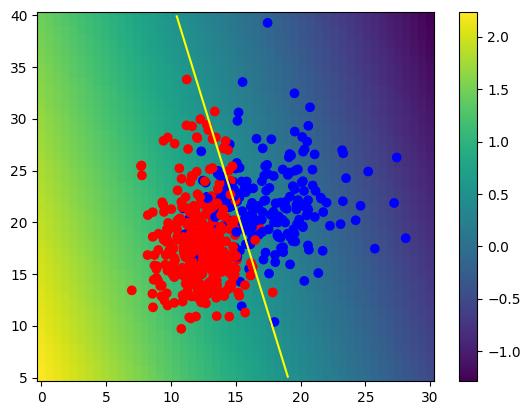

In [13]:
grad_desc_weights = grad_desc(data, target, lr=0.001, epochs=1000000)
scores = classifier_score(data, grad_desc_weights)
print(accuracy(scores, target))

plot_data(data, target, grad_desc_weights)

Mittels Gradient Descent wird eine Accuracy von 88.4% erreicht.  
Die Loss-Funktion ist problematisch, da sie die Differenzen quadriert, was große Fehler überproportional einfließen lässt.  
Eine bessere Alternative wäre Cross-Entropy-Loss (siehe Aufgabe 2)